## Text label file 생성

In [59]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob

In [60]:
json_path = '/mobot/satelite/park/datasets/labels.json'
with open(json_path) as json_file:
    json_data = json.load(json_file)

In [61]:
imgs_ls = [] ; tyid_ls = [] ; tyname_ls = [] ; coords_ls = []
for i in range(len(json_data['features'])):
    line = json_data['features'][i]['properties']
    coords = line['bounds_imcoords']
    coords = ' '.join(coords.split(','))
    imgs = line['image_id'] # ex. 0.png
    tyid = line['type_id'] # ex. 4
    tyname = line['type_name'] ; tyname = tyname.replace(' ','-') # ex. maritime-vessels
    
    imgs_ls.append(imgs)
    tyid_ls.append(tyid)
    tyname_ls.append(tyname)
    coords_ls.append(coords)
    
label = pd.DataFrame({'img':imgs_ls,'coords':coords_ls,'type_name':tyname_ls,'type_id':tyid_ls})
print(label.shape)

(10682, 4)


In [62]:
label.head(3)

img                                             coords         type_name  \
0  0.png  2236.341486450408 2011.8619141770253 2238.6656...  maritime-vessels   
1  0.png  2185.5794404486546 2056.4704288715725 2187.032...  maritime-vessels   
2  0.png  2314.6836988962705 1865.188985750079 2341.2802...  maritime-vessels   

   type_id  
0        4  
1        4  
2        4

In [63]:
label.tail(3)

img                                             coords  \
10679  1663.png  1180.5382902111674 878.9003660581477 1214.6409...   
10680  1663.png  1529.5521793123817 445.13827765127047 1547.296...   
10681  1663.png  37.76362973720737 2226.389429937622 71.9859932...   

              type_name  type_id  
10679  maritime-vessels        4  
10680  maritime-vessels        4  
10681  maritime-vessels        4

In [64]:
imgs = list(label.img.unique())
directory = '/mobot/satelite/park/datasets/labelTxt'
if not os.path.exists(directory):
    os.mkdir(directory)
    
for img_id in imgs:
    img_name = img_id.strip('.png')
    img_df = label[label.img == img_id].reset_index(drop=True)
    text = open(os.path.join(directory,'{}.txt'.format(img_name)),'w')
    for i in range(img_df.shape[0]):
        coords = img_df['coords'][i]
        tyname = img_df['type_name'][i]
        data = coords + ' ' + tyname + ' ' + '0\n' # difficult는 0으로 통일
        text.write(data)
    text.close()

In [65]:
len(glob.glob('/mobot/satelite/park/datasets/labelTxt/*.txt'))

1664

In [56]:
for i in range(1664):
    text_name = '/mobot/satelite/park/datasets/labelTxt/' + str(i) + '.txt'
    
    if os.path.isfile(text_name) == False:
        text = open(text_name,'w')
        text.write('')
        text.close()

/mobot/satelite/park/datasets/labelTxt/0.txt
/mobot/satelite/park/datasets/labelTxt/1.txt
/mobot/satelite/park/datasets/labelTxt/2.txt
/mobot/satelite/park/datasets/labelTxt/3.txt
/mobot/satelite/park/datasets/labelTxt/4.txt
/mobot/satelite/park/datasets/labelTxt/5.txt
/mobot/satelite/park/datasets/labelTxt/6.txt
/mobot/satelite/park/datasets/labelTxt/7.txt
/mobot/satelite/park/datasets/labelTxt/8.txt
/mobot/satelite/park/datasets/labelTxt/9.txt
/mobot/satelite/park/datasets/labelTxt/10.txt
/mobot/satelite/park/datasets/labelTxt/11.txt
/mobot/satelite/park/datasets/labelTxt/12.txt
/mobot/satelite/park/datasets/labelTxt/13.txt
/mobot/satelite/park/datasets/labelTxt/14.txt
/mobot/satelite/park/datasets/labelTxt/15.txt
/mobot/satelite/park/datasets/labelTxt/16.txt
/mobot/satelite/park/datasets/labelTxt/17.txt
/mobot/satelite/park/datasets/labelTxt/18.txt
/mobot/satelite/park/datasets/labelTxt/19.txt
/mobot/satelite/park/datasets/labelTxt/20.txt
/mobot/satelite/park/datasets/labelTxt/21.tx

## Image/Label Split 

In [66]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from DOTA import DOTA
import dota_utils as util
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

In [67]:
example = DOTA('/mobot/satelite/park/datasets/')
imgids = example.getImgIds()
imgid = imgids[0]
img = example.loadImgs(imgid)[0]

isarralike: False
imgids: ['0']
filename: /mobot/satelite/park/datasets/images/0.png


In [68]:
len(imgids)

1664

isarralike: False
imgids: ['0']
filename: /mobot/satelite/park/datasets/images/0.png


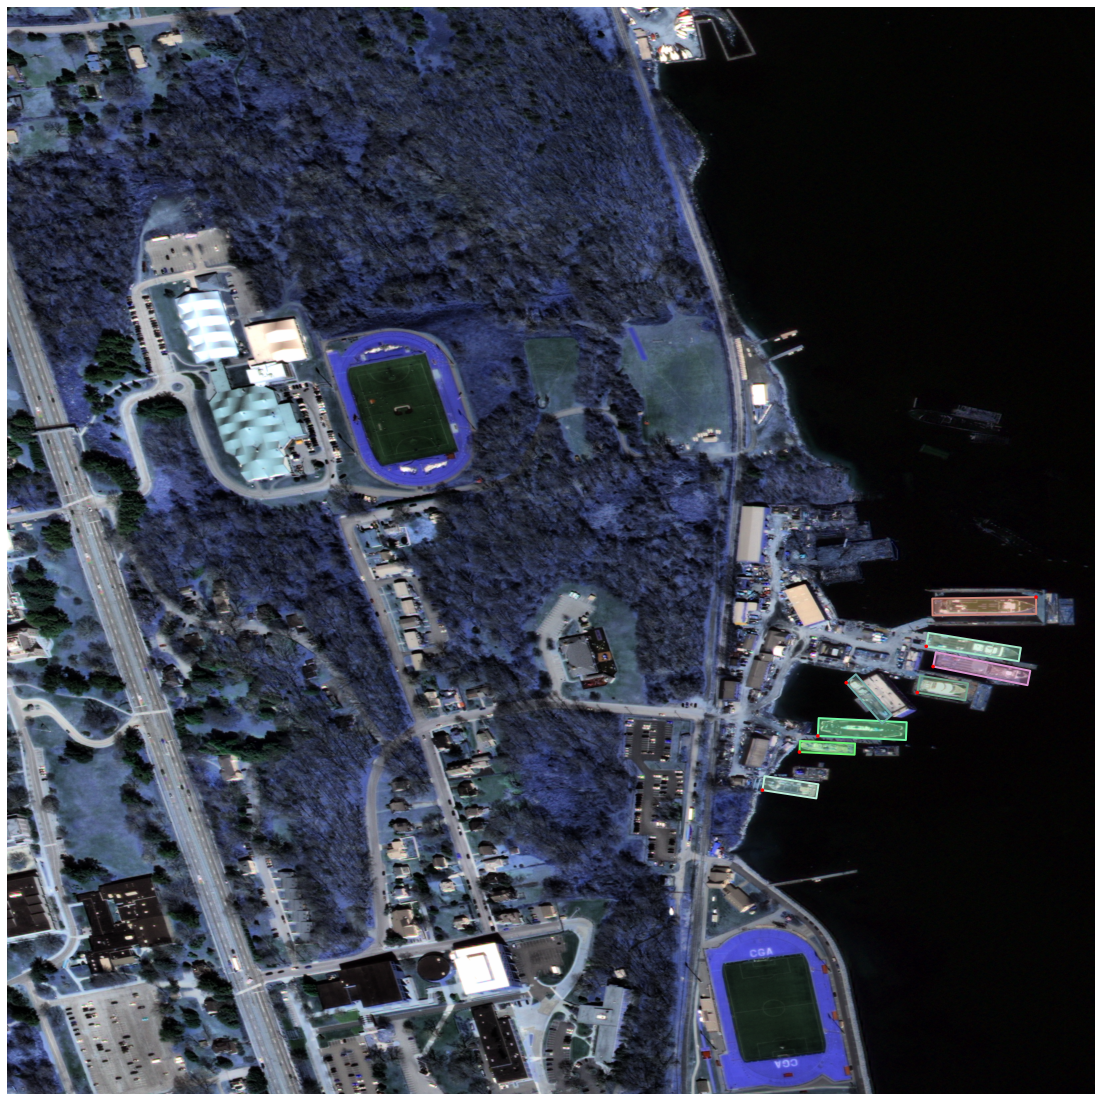

In [69]:
anns = example.loadAnns(imgId=imgid)
example.showAnns(anns, imgid, 2)
plt.imshow(img)
plt.show()

In [72]:
from ImgSplit_multi_process import splitbase

In [73]:
'''
split = splitbase(r'/mobot/satelite/park/datasets/', 
                  r'/mobot/satelite/park/datasets_split/', 
                  gap=400,
                  subsize = 1408,
                  choosebestpoint=True)
split.splitdata(1)
'''

padding: True


isarralike: False
imgids: ['0__1__1592___1008']
filename: /mobot/satelite/park/datasets_split/images/0__1__1592___1008.png
isarralike: False
imgids: ['0__1__1592___1008']
filename: /mobot/satelite/park/datasets_split/images/0__1__1592___1008.png


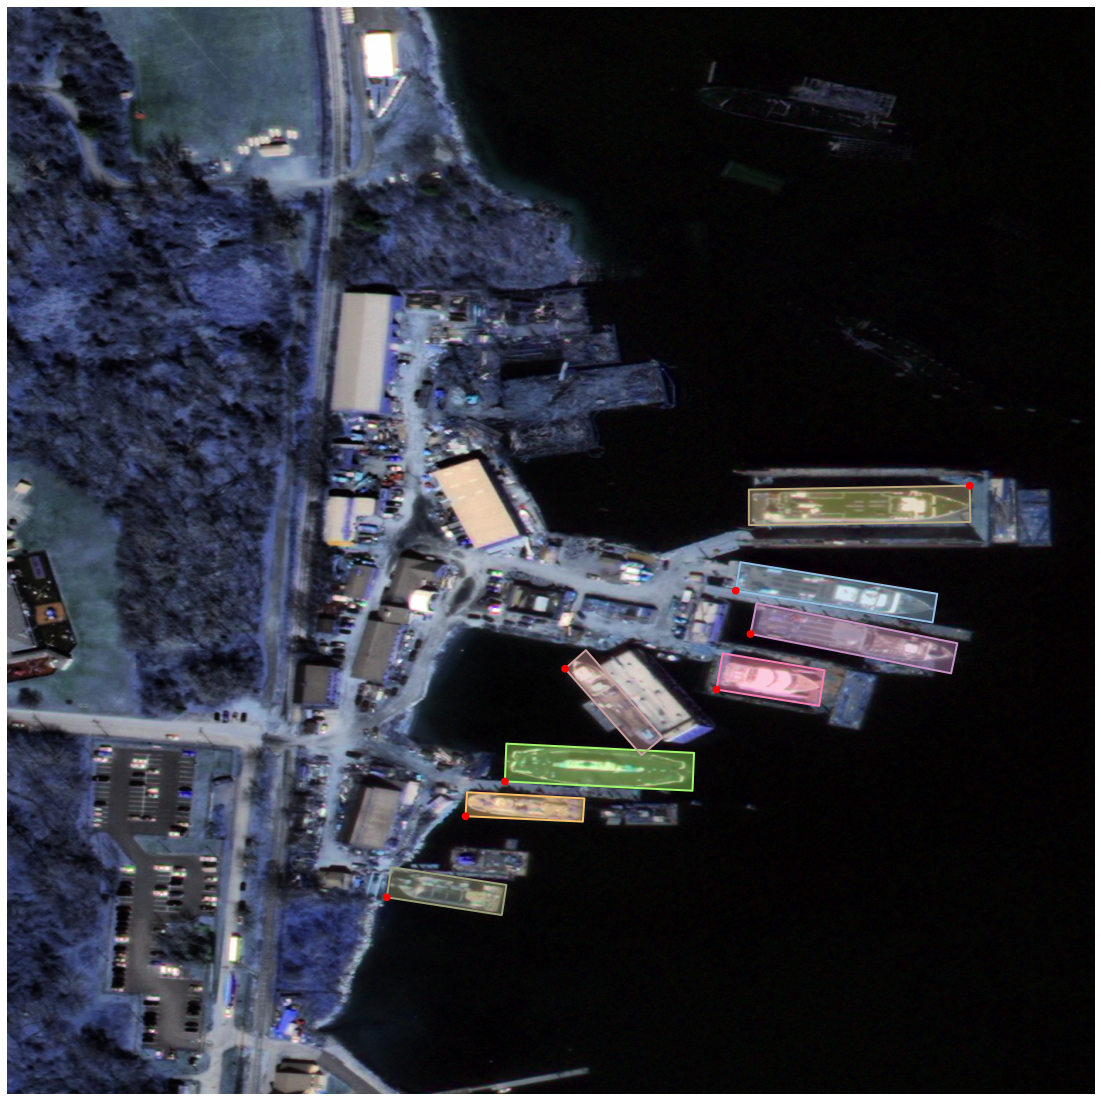

In [248]:
examplesplit = DOTA(r'/mobot/satelite/park/datasets_split/')
imgids = examplesplit.getImgIds()
imgids.sort()
imgid = imgids[7]
img = examplesplit.loadImgs(imgid)[0]

anns = examplesplit.loadAnns(imgId=imgid)
# print(anns)
examplesplit.showAnns(anns, imgid, 2)

In [91]:
images_list = glob.glob('/mobot/satelite/park/datasets_split/images/*.png')
images_list.sort()
print(len(images_list))
images_list[0]

14976


'/mobot/satelite/park/datasets_split/images/0__1__0___0.png'

In [92]:
txt_list = glob.glob('/mobot/satelite/park/datasets_split/labelTxt/*.txt')
txt_list.sort()
print(len(txt_list))
txt_list[0]

14976


'/mobot/satelite/park/datasets_split/labelTxt/0__1__0___0.txt'

## CSV 파일로 만들기

In [100]:
import pandas as pd

In [340]:
a, b = map(int, map(float, ['1.0' , '2.0']))
a, b

(1, 2)

In [341]:
df = pd.DataFrame(columns = ['image', 'x1','y1','x2','y2','x3','y3','x4','y4','class_name'])


for i in range(len(txt_list)):
    
    tmp_text = txt_list[i]
    contents = open(tmp_text, 'r')
    lines = contents.readlines()
    
    if len(lines) == 0 :
        tmp_df = pd.DataFrame(index = range(1), columns = ['image', 'x1','y1','x2','y2','x3','y3','x4','y4','class_name'])
        tmp_df['image'][0] = '/mobot/satelite/park/datasets_split/images/' + tmp_text.split(sep='/')[-1].strip('.txt') + '.png'
        
    else :
        tmp_df = pd.DataFrame(index = range(len(lines)), columns = ['image', 'x1','y1','x2','y2','x3','y3','x4','y4','class_name'])   
        for j in range(len(lines)):
            tmp_df['image'][j] = '/mobot/satelite/park/datasets_split/images/' + tmp_text.split(sep='/')[-1].strip('.txt') + '.png'
            tmp_df['x1'][j], tmp_df['y1'][j], tmp_df['x2'][j], tmp_df['y2'][j], tmp_df['x3'][j], tmp_df['y3'][j], tmp_df['x4'][j], tmp_df['y4'][j] = map(int, map(float, lines[j].split(sep=' ')[:8]))
            tmp_df['class_name'][j] = lines[j].split(sep=' ')[8]
    
    df = pd.concat([df, tmp_df])
    df = df.reset_index(drop=True)

In [342]:
df # 모든 이미지가 들어있는 파일 (이미지 내부에 배가 없는 것도 포함)

image    x1    y1    x2  \
0      /mobot/satelite/park/datasets_split/images/0__...   NaN   NaN   NaN   
1      /mobot/satelite/park/datasets_split/images/0__...   NaN   NaN   NaN   
2      /mobot/satelite/park/datasets_split/images/0__...   NaN   NaN   NaN   
3      /mobot/satelite/park/datasets_split/images/0__...   NaN   NaN   NaN   
4      /mobot/satelite/park/datasets_split/images/0__...  1228  1003  1230   
...                                                  ...   ...   ...   ...   
31662  /mobot/satelite/park/datasets_split/images/9__...  1061  1208  1093   
31663  /mobot/satelite/park/datasets_split/images/9__...  1061   624  1093   
31664  /mobot/satelite/park/datasets_split/images/9__...   NaN   NaN   NaN   
31665  /mobot/satelite/park/datasets_split/images/9__...   477  1208   509   
31666  /mobot/satelite/park/datasets_split/images/9__...   477   624   509   

         y2    x3    y3    x4    y4        class_name  
0       NaN   NaN   NaN   NaN   NaN               NaN  
1       NaN   NaN   NaN   NaN   NaN               NaN  
2       NaN   NaN   NaN   NaN   NaN               NaN  
3       NaN   NaN   NaN   NaN   NaN               NaN  
4       954  1408   962  1408  1011  maritime-vessels  
...     ...   ...   ...   ...   ...               ...  
31662  1265   838  1408   762  1394         container  
31663   681   787   853   755   796         container  
31664   NaN   NaN   NaN   NaN   NaN               NaN  
31665  1265   254  1408   178  1394         container  
31666   681   203   853   171   796         container  

[31667 rows x 10 columns]

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31667 entries, 0 to 31666
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       31667 non-null  object
 1   x1          23136 non-null  object
 2   y1          23136 non-null  object
 3   x2          23136 non-null  object
 4   y2          23136 non-null  object
 5   x3          23136 non-null  object
 6   y3          23136 non-null  object
 7   x4          23136 non-null  object
 8   y4          23136 non-null  object
 9   class_name  23136 non-null  object
dtypes: object(10)
memory usage: 2.4+ MB


In [344]:
df_boat = df.dropna(how='any').reset_index(drop=True)
df_boat

image    x1    y1    x2  \
0      /mobot/satelite/park/datasets_split/images/0__...  1228  1003  1230   
1      /mobot/satelite/park/datasets_split/images/0__...  1177  1048  1179   
2      /mobot/satelite/park/datasets_split/images/0__...  1306   857  1333   
3      /mobot/satelite/park/datasets_split/images/0__...  1075  1153  1081   
4      /mobot/satelite/park/datasets_split/images/0__...   644  1003   646   
...                                                  ...   ...   ...   ...   
23131  /mobot/satelite/park/datasets_split/images/99_...   135   538   163   
23132  /mobot/satelite/park/datasets_split/images/9__...  1061  1208  1093   
23133  /mobot/satelite/park/datasets_split/images/9__...  1061   624  1093   
23134  /mobot/satelite/park/datasets_split/images/9__...   477  1208   509   
23135  /mobot/satelite/park/datasets_split/images/9__...   477   624   509   

         y2    x3    y3    x4    y4        class_name  
0       954  1408   962  1408  1011  maritime-vessels  
1      1017  1331  1025  1329  1055  maritime-vessels  
2       833  1408   918  1406   967  maritime-vessels  
3      1114  1230  1137  1224  1176  maritime-vessels  
4       954   889   966   887  1015  maritime-vessels  
...     ...   ...   ...   ...   ...               ...  
23131   526   199   611   172   623  maritime-vessels  
23132  1265   838  1408   762  1394         container  
23133   681   787   853   755   796         container  
23134  1265   254  1408   178  1394         container  
23135   681   203   853   171   796         container  

[23136 rows x 10 columns]

In [345]:
df_boat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23136 entries, 0 to 23135
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       23136 non-null  object
 1   x1          23136 non-null  object
 2   y1          23136 non-null  object
 3   x2          23136 non-null  object
 4   y2          23136 non-null  object
 5   x3          23136 non-null  object
 6   y3          23136 non-null  object
 7   x4          23136 non-null  object
 8   y4          23136 non-null  object
 9   class_name  23136 non-null  object
dtypes: object(10)
memory usage: 1.8+ MB


In [359]:
len(df_boat['image'].unique())

6445

In [364]:
num = 19980

for i in range(num, num+20):
    print(df_boat['image'][i])

/mobot/satelite/park/datasets_split/images/812__1__1592___1008.png
/mobot/satelite/park/datasets_split/images/813__1__0___0.png
/mobot/satelite/park/datasets_split/images/813__1__0___0.png
/mobot/satelite/park/datasets_split/images/813__1__0___0.png
/mobot/satelite/park/datasets_split/images/813__1__0___0.png
/mobot/satelite/park/datasets_split/images/813__1__0___0.png
/mobot/satelite/park/datasets_split/images/813__1__0___0.png
/mobot/satelite/park/datasets_split/images/813__1__0___0.png
/mobot/satelite/park/datasets_split/images/813__1__0___0.png
/mobot/satelite/park/datasets_split/images/813__1__0___0.png
/mobot/satelite/park/datasets_split/images/813__1__0___0.png
/mobot/satelite/park/datasets_split/images/813__1__0___0.png
/mobot/satelite/park/datasets_split/images/813__1__0___0.png
/mobot/satelite/park/datasets_split/images/813__1__0___0.png
/mobot/satelite/park/datasets_split/images/813__1__0___1008.png
/mobot/satelite/park/datasets_split/images/813__1__0___1008.png
/mobot/satel

In [380]:
df_boat['image'][:19981]

0        /mobot/satelite/park/datasets_split/images/0__...
1        /mobot/satelite/park/datasets_split/images/0__...
2        /mobot/satelite/park/datasets_split/images/0__...
3        /mobot/satelite/park/datasets_split/images/0__...
4        /mobot/satelite/park/datasets_split/images/0__...
                               ...                        
19976    /mobot/satelite/park/datasets_split/images/811...
19977    /mobot/satelite/park/datasets_split/images/812...
19978    /mobot/satelite/park/datasets_split/images/812...
19979    /mobot/satelite/park/datasets_split/images/812...
19980    /mobot/satelite/park/datasets_split/images/812...
Name: image, Length: 19981, dtype: object

In [375]:
df_boat['image'][19981:]

19981    /mobot/satelite/park/datasets_split/images/813...
19982    /mobot/satelite/park/datasets_split/images/813...
19983    /mobot/satelite/park/datasets_split/images/813...
19984    /mobot/satelite/park/datasets_split/images/813...
19985    /mobot/satelite/park/datasets_split/images/813...
                               ...                        
23131    /mobot/satelite/park/datasets_split/images/99_...
23132    /mobot/satelite/park/datasets_split/images/9__...
23133    /mobot/satelite/park/datasets_split/images/9__...
23134    /mobot/satelite/park/datasets_split/images/9__...
23135    /mobot/satelite/park/datasets_split/images/9__...
Name: image, Length: 3155, dtype: object

In [378]:
len(df_boat['image'][:19981].unique())

5558

In [379]:
len(df_boat['image'][19981:].unique())

887

In [382]:
df_train =df_boat[:19981]
df_val = df_boat[19981:]

In [383]:
df_train

image    x1    y1    x2  \
0      /mobot/satelite/park/datasets_split/images/0__...  1228  1003  1230   
1      /mobot/satelite/park/datasets_split/images/0__...  1177  1048  1179   
2      /mobot/satelite/park/datasets_split/images/0__...  1306   857  1333   
3      /mobot/satelite/park/datasets_split/images/0__...  1075  1153  1081   
4      /mobot/satelite/park/datasets_split/images/0__...   644  1003   646   
...                                                  ...   ...   ...   ...   
19976  /mobot/satelite/park/datasets_split/images/811...    42   310    50   
19977  /mobot/satelite/park/datasets_split/images/812...   975   928  1014   
19978  /mobot/satelite/park/datasets_split/images/812...   890     1   972   
19979  /mobot/satelite/park/datasets_split/images/812...   391   928   430   
19980  /mobot/satelite/park/datasets_split/images/812...   306     1   388   

         y2    x3    y3    x4    y4        class_name  
0       954  1408   962  1408  1011  maritime-vessels  
1      1017  1331  1025  1329  1055  maritime-vessels  
2       833  1408   918  1406   967  maritime-vessels  
3      1114  1230  1137  1224  1176  maritime-vessels  
4       954   889   966   887  1015  maritime-vessels  
...     ...   ...   ...   ...   ...               ...  
19976   335     1   349     1   321  maritime-vessels  
19977   969   816  1155   778  1115        oil-tanker  
19978     1   816   147   778   107        oil-tanker  
19979   969   232  1155   194  1115        oil-tanker  
19980     1   232   147   194   107        oil-tanker  

[19981 rows x 10 columns]

In [384]:
df_val

image    x1    y1    x2  \
19981  /mobot/satelite/park/datasets_split/images/813...  1118  1367  1134   
19982  /mobot/satelite/park/datasets_split/images/813...  1118  1335  1133   
19983  /mobot/satelite/park/datasets_split/images/813...  1101  1315  1117   
19984  /mobot/satelite/park/datasets_split/images/813...   370   921   383   
19985  /mobot/satelite/park/datasets_split/images/813...   439  1010   453   
...                                                  ...   ...   ...   ...   
23131  /mobot/satelite/park/datasets_split/images/99_...   135   538   163   
23132  /mobot/satelite/park/datasets_split/images/9__...  1061  1208  1093   
23133  /mobot/satelite/park/datasets_split/images/9__...  1061   624  1093   
23134  /mobot/satelite/park/datasets_split/images/9__...   477  1208   509   
23135  /mobot/satelite/park/datasets_split/images/9__...   477   624   509   

         y2    x3    y3    x4    y4        class_name  
19981  1387  1107  1408  1064  1408  maritime-vessels  
19982  1354  1063  1408  1024  1408  maritime-vessels  
19983  1335  1023  1408   981  1408  maritime-vessels  
19984   940   306   997   292   979  maritime-vessels  
19985  1028   374  1085   361  1067  maritime-vessels  
...     ...   ...   ...   ...   ...               ...  
23131   526   199   611   172   623  maritime-vessels  
23132  1265   838  1408   762  1394         container  
23133   681   787   853   755   796         container  
23134  1265   254  1408   178  1394         container  
23135   681   203   853   171   796         container  

[3155 rows x 10 columns]

In [385]:
df_train.to_csv('/mobot/satelite/park/EfficientDet/train.csv', index=False,header = False)
df_val.to_csv('/mobot/satelite/park/EfficientDet/val.csv', index=False,header = False)

In [386]:
pd.read_csv('/mobot/satelite/park/EfficientDet/train.csv')

/mobot/satelite/park/datasets_split/images/0__1__1008___1008.png  1228  \
0      /mobot/satelite/park/datasets_split/images/0__...                1177   
1      /mobot/satelite/park/datasets_split/images/0__...                1306   
2      /mobot/satelite/park/datasets_split/images/0__...                1075   
3      /mobot/satelite/park/datasets_split/images/0__...                 644   
4      /mobot/satelite/park/datasets_split/images/0__...                 593   
...                                                  ...                 ...   
19975  /mobot/satelite/park/datasets_split/images/811...                  42   
19976  /mobot/satelite/park/datasets_split/images/812...                 975   
19977  /mobot/satelite/park/datasets_split/images/812...                 890   
19978  /mobot/satelite/park/datasets_split/images/812...                 391   
19979  /mobot/satelite/park/datasets_split/images/812...                 306   

       1003  1230   954  1408   962  1408.1  1011  maritime-vessels  
0      1048  1179  1017  1331  1025    1329  1055  maritime-vessels  
1       857  1333   833  1408   918    1406   967  maritime-vessels  
2      1153  1081  1114  1230  1137    1224  1176  maritime-vessels  
3      1003   646   954   889   966     887  1015  maritime-vessels  
4      1048   595  1017   747  1025     745  1055  maritime-vessels  
...     ...   ...   ...   ...   ...     ...   ...               ...  
19975   310    50   335     1   349       1   321  maritime-vessels  
19976   928  1014   969   816  1155     778  1115        oil-tanker  
19977     1   972     1   816   147     778   107        oil-tanker  
19978   928   430   969   232  1155     194  1115        oil-tanker  
19979     1   388     1   232   147     194   107        oil-tanker  

[19980 rows x 10 columns]

In [387]:
pd.read_csv('/mobot/satelite/park/EfficientDet/val.csv')

/mobot/satelite/park/datasets_split/images/813__1__0___0.png  1118  1367  \
0     /mobot/satelite/park/datasets_split/images/813...            1118  1335   
1     /mobot/satelite/park/datasets_split/images/813...            1101  1315   
2     /mobot/satelite/park/datasets_split/images/813...             370   921   
3     /mobot/satelite/park/datasets_split/images/813...             439  1010   
4     /mobot/satelite/park/datasets_split/images/813...             427   992   
...                                                 ...             ...   ...   
3149  /mobot/satelite/park/datasets_split/images/99_...             135   538   
3150  /mobot/satelite/park/datasets_split/images/9__...            1061  1208   
3151  /mobot/satelite/park/datasets_split/images/9__...            1061   624   
3152  /mobot/satelite/park/datasets_split/images/9__...             477  1208   
3153  /mobot/satelite/park/datasets_split/images/9__...             477   624   

      1134  1387  1107  1408  1064  1408.1  maritime-vessels  
0     1133  1354  1063  1408  1024    1408  maritime-vessels  
1     1117  1335  1023  1408   981    1408  maritime-vessels  
2      383   940   306   997   292     979  maritime-vessels  
3      453  1028   374  1085   361    1067  maritime-vessels  
4      440  1010   361  1067   348    1050  maritime-vessels  
...    ...   ...   ...   ...   ...     ...               ...  
3149   163   526   199   611   172     623  maritime-vessels  
3150  1093  1265   838  1408   762    1394         container  
3151  1093   681   787   853   755     796         container  
3152   509  1265   254  1408   178    1394         container  
3153   509   681   203   853   171     796         container  

[3154 rows x 10 columns]